In [35]:
# With numerical speed and computing prowess 
# The number package in python
# Domain Expansion:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as img
import imageio

## Setting UP

Includes downloading and reformatting the raw data into something i want to work with. In this case, I want the csv of strings into a 2D Array of integers. And then make a function that shows it as a .png format (for the visualization, i will just ask ChatGPT for an algorithm since its not really important in the problem solving aspect)

In [36]:
# Raw data from the internet
csv = [
    '003020600',
    '900305001',
    '001806400',
    '008102900',
    '700000008',
    '006708200',
    '002609500',
    '800203009',
    '005010300']


In [37]:
# Reformatting the data
data = []
empty = []
for i in csv:
    list1 = []
    for char in i:
        list1.append(int(char))                         # This essentially turns this into
    data.append(list1)                                  # a 2D Array. I prefer to keep things that way


# For Visualization as .png. 
# Taken from GPT using simple imshow and label
# Many ways to do this, no need to overthink
# Just for Aesthetics
def vis(data):
    fig , ax = plt.subplots()
    cax = ax.imshow(
        data, 
        cmap='binary', 
        interpolation='nearest',
        vmin = 0,
        vmax = 20
        )
    
    fig.suptitle("Sudoku Solver Algorithm", fontsize=14)
    fig.text(0.5, 0.05, "By Rwen Narvarte", ha='center', fontsize=11)
    fig.text(0,0.8, f"# Of Empty Cells: {len(empty)}", fontsize=8)


    for i in range(len(data)):
        for j in range(len(data)):
            ax.text(j, 
                    i, 
                    data[i][j], 
                    ha='center', 
                    va='center', 
                    color='black', 
                    fontsize=12
                    )

    ax.tick_params(
        top=False, 
        bottom=False, 
        left=False, 
        right=False, 
        labelleft=False, 
        labelbottom=False
        )
    
    plt.savefig(filename)
    plt.close()



# This one is for turning the .png into a .gif later
# Many ways to do this, again, just for aesthetics
frames = []
for i in range(0,5):
    filename = f'frame{i}.png'
    vis(data)
    frames.append(imageio.imread(filename))




C:\Users\rbnar\AppData\Local\Temp\ipykernel_13420\3382276758.py:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


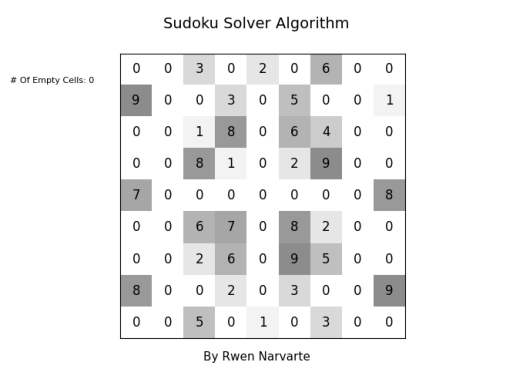

In [38]:
# Just to show you how the puzzle looks like 
frame0 = img.imread('frame0.png')  
plt.imshow(frame0)
plt.axis('off')  
plt.show()

## Some Translators

I defined some functions that allows me to extract useful information from the 2D array. <br>
Examples are `Col(y,x)` that gives me the list of numbers found in the column of the coordinate (y,x)


In [39]:
# Checking the 3x3 Box
def box(y,x):

    if (y%3) - 1 != 0: y_center = y - ((y%3)-1)                 # y%3 because each big block is 3 blocks high. I want to "quantize/group" it
    else: y_center = y                                        # I want to know the distance between the current y from the center
                                                                # This way. I can add/subtract back the distance to the current y
                                                                # to get y_center.

    if (x%3) - 1 != 0: x_center = x - ((x%3)-1)
    else: x_center = x

    # Kernel Density (Not "Kernel" from comsci but "Kernel" from Math)
    boxlist = [
        data[y_center-1][x_center-1] , data[y_center-1][x_center] , data[y_center-1][x_center+1] ,
        data[y_center][x_center-1] , data[y_center][x_center] , data[y_center][x_center+1] ,
        data[y_center+1][x_center-1] , data[y_center+1][x_center] , data[y_center+1][x_center+1]
    ]
    return boxlist


def col(y,x):
    collist = []
    for y in data:
        collist.append(y[x])
    return collist


def row(y,x):
    return data[y]

Let's check the algorithms so far:

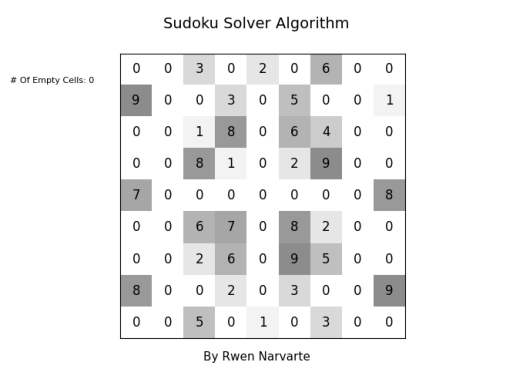

Lets check what info we can get from the coordinate (4,3)
Box Boundary: [1, 0, 2, 0, 0, 0, 7, 0, 8]
Column Boundary: [0, 3, 8, 1, 0, 7, 6, 2, 0]
Row Boundary: [7, 0, 0, 0, 0, 0, 0, 0, 8]


In [40]:
# my coordinate system is (y,x) instead of (x,y)
# and (0,0) is the top left cell of the puzzle
# (8,8) is the bottom right cell of the puzzle
frame0 = img.imread('frame0.png')  
plt.imshow(frame0)
plt.axis('off')  
plt.show()

print('Lets check what info we can get from the coordinate (4,3)')
print(f'Box Boundary: {box(4,3)}')
print(f'Column Boundary: {col(4,3)}')
print(f'Row Boundary: {row(4,3)}')

Some Algorithms

In [41]:
# Generate list of blanks in the puzzle
# Asked GPT for this one for a better time complexity that doing double for loop
empty = [(y_0,x_0) for y_0 in range(len(data)) for x_0 in range(len(data[y_0])) if data[y_0][x_0] == 0]
print(empty)
print(f'Number of Blank Cells: {len(empty)}')


# This is the set of numbers that can be in a cell. Just for reference
basis = [1,2,3,4,5,6,7,8,9] 

[(0, 0), (0, 1), (0, 3), (0, 5), (0, 7), (0, 8), (1, 1), (1, 2), (1, 4), (1, 6), (1, 7), (2, 0), (2, 1), (2, 4), (2, 7), (2, 8), (3, 0), (3, 1), (3, 4), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 4), (5, 7), (5, 8), (6, 0), (6, 1), (6, 4), (6, 7), (6, 8), (7, 1), (7, 2), (7, 4), (7, 6), (7, 7), (8, 0), (8, 1), (8, 3), (8, 5), (8, 7), (8, 8)]
Number of Blank Cells: 49


In [42]:
# Cross Method
# Check Row, Column, and Box for Missing Number
def cross(y,x):
    cross = box(y,x) + col(y,x) + row(y,x)                      # Gives me all the numbers in the box, col, and row 

    cross = [ _ for _ in cross if _ != 0 ]                      # Removes all empty cells (zeroes) in the list "cross"
    subtract = [ _ for _ in basis if _ not in cross]            # checks what numbers arent in the box, col, and row


    return subtract


Computation

In [43]:
# Line 2 and 3 is just for visualization
sweep = 5
filename = f'frame_{sweep}.png'


# Overall Algortihm
while len(empty) > 0:
    for y,x in empty:
        if len(cross(y,x)) == 1:
            data[y][x] = cross(y,x)[0]
            empty.remove((y,x))

            # Line 12,13, and 15 is just for visualization and aesthetics
            vis(data)       
            sweep += 1

            frames.append(imageio.imread(filename))

C:\Users\rbnar\AppData\Local\Temp\ipykernel_13420\1273359040.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


Video

In [44]:
imageio.mimsave('output.gif', frames, duration=0.1)

# Check "Output.mp4" To see the results